In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
# load dataset
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,197677,2023-03-31,f,"$11,000.00","$11,000.00",3,1125
1,197677,2023-04-01,f,"$11,000.00","$11,000.00",3,1125
2,197677,2023-04-02,f,"$11,000.00","$11,000.00",3,1125
3,197677,2023-04-03,f,"$11,000.00","$11,000.00",3,1125
4,197677,2023-04-04,f,"$11,000.00","$11,000.00",3,1125


In [4]:
calendar.shape

(3685246, 7)

In [5]:
# Menghilangkan $ dari 'price' dan 'adjusted_price'
calendar["price"] = calendar["price"].str.replace("[$, ]", "").astype(float)
calendar["adjusted_price"] = calendar["adjusted_price"].str.replace("[$, ]", "").astype(float)

<ipython-input-5-6304769f0b08>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  calendar["price"] = calendar["price"].str.replace("[$, ]", "").astype(float)
<ipython-input-5-6304769f0b08>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  calendar["adjusted_price"] = calendar["adjusted_price"].str.replace("[$, ]", "").astype(float)


In [6]:
print('Harga termahal {}.'.format(calendar['price'].max()))
print('Harga termurah {}.'.format(calendar['price'].min()))
print('Harga rata-rata {}.'.format(calendar['price'].mean()))

Harga termahal 9999999.0.
Harga termurah 0.0.
Harga rata-rata 35791.317921245965.


In [7]:
# Harga termahal nampak seperti outlier
# Salah satu pengertian outlier adalah setiap titik data yang melebihi 1,5 rentang interkuartil (IQR) di bawah kuartil pertama atau di atas kuartil ketiga.
# Menghitung IQR
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering nilai diantara Q1-1.5IQR dan Q3+1.5IQR
calendar_new = calendar.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

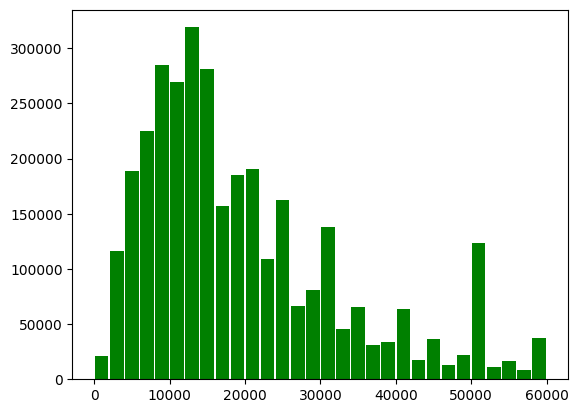

In [8]:
plt.hist(calendar_new['price'], bins=30, color='green', rwidth=0.9)
plt.show()

In [9]:
listing.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10122,855656409986242849,https://www.airbnb.com/rooms/855656409986242849,20230331001140,2023-03-31,city scrape,"Lucky You! Yotsuya, 10m to Shinjuku/距离新宿10分钟(b1)",新宿御苑から歩いて15分の距離にあるLucky You! Yotsuyaは、徒歩7分でJR四...,NaN,https://a0.muscache.com/pictures/bcad1e3e-fbaa...,505752063,...,NaN,NaN,NaN,M130033047,t,6,6,0,0,NaN
10123,855677778130076588,https://www.airbnb.com/rooms/855677778130076588,20230331001140,2023-03-31,city scrape,4BR/80㎡ Cozy Home｜5 mins to Sta.｜Ueno/Asakusa ...,"My house is an 80㎡ apartment with 4 bedrooms, ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,230604374,...,NaN,NaN,NaN,M130033219,t,6,6,0,0,NaN
10124,856973933266780879,https://www.airbnb.com/rooms/856973933266780879,20230331001140,2023-03-31,city scrape,Guess house 小岩203,This room is refitted in March 2023.<br /><br ...,亀戸天神➡Kamiedotenjin <br />臨海水族館➡Rinkaisuizokukk...,https://a0.muscache.com/pictures/e4957f6a-7a58...,24575613,...,NaN,NaN,NaN,M130033178,f,11,11,0,0,NaN
10125,857393066743965534,https://www.airbnb.com/rooms/857393066743965534,20230331001140,2023-03-31,city scrape,近東京、新宿、晴空塔、浅草橋、秋葉原、上野、商业街居酒屋。可做饭套房，距駅歩行8分全新整套房子,欢迎来到一和園民泊！这里地处東京都心位置。交通非常便利，<br />从家里到JR総武線平井站...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,269684336,...,NaN,NaN,NaN,M130029867,t,12,10,2,0,NaN
10126,857607535670954602,https://www.airbnb.com/rooms/857607535670954602,20230331001140,2023-03-31,city scrape,Clean!Confortable!convenience!,こちらの魅力的な宿泊先の素敵なインテリアを、きっと気にいっていただけるはずです。<br />...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495796275,...,NaN,NaN,NaN,Hotels and Inns Business Act | 東京都台東区台東保健所 | 4...,t,2,1,1,0,NaN


In [10]:
listing.shape

(10127, 75)

In [11]:
# Menghilangkan $ dari 'price'
listing["price"] = listing["price"].str.replace("[$, ]", "").astype(float)

<ipython-input-11-aad64f0b4c95>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listing["price"] = listing["price"].str.replace("[$, ]", "").astype(float)


In [12]:
print('Harga termahal {}.'.format(listing['price'].max()))
print('Harga termurah {}.'.format(listing['price'].min()))
print('Harga rata-rata {}.'.format(listing['price'].mean()))

Harga termahal 1306500.0.
Harga termurah 0.0.
Harga rata-rata 26341.777229189294.


In [13]:
# Harga termahal nampak seperti outlier
# Salah satu pengertian outlier adalah setiap titik data yang melebihi 1,5 rentang interkuartil (IQR) di bawah kuartil pertama atau di atas kuartil ketiga.
# Menghitung IQR
Q1 = listing['price'].quantile(0.25)
Q3 = listing['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering nilai diantara Q1-1.5IQR dan Q3+1.5IQR
listing = listing.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

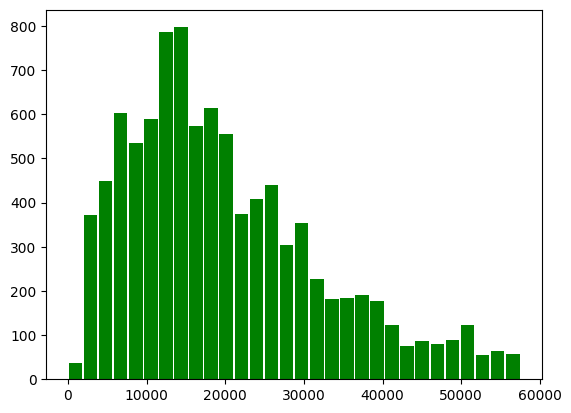

In [14]:
plt.hist(listing['price'], bins=30, color='green', rwidth=0.9)
plt.show()

# Kapan waktu tersibuk untuk mengunjungi Tokyo? Serta berapa biaya perkiraannya?

In [15]:
# Explore the calendar.csv
print('Jumlah yang tersedia dalam kalender {}'.format(calendar_new[calendar_new['available'] == 't']['available'].count()))
print('Jumlah yang tidak tersedia dalam kalender {}'.format(calendar_new[calendar_new['available'] == 'f']['available'].count()))

Jumlah yang tersedia dalam kalender 1155592
Jumlah yang tidak tersedia dalam kalender 2164744


In [16]:
# Durasi dalam data calendar
print('Durasinya diantara {} dan {}.'.format(calendar_new['date'].min(), calendar_new['date'].max()))

Durasinya diantara 2023-03-31 dan 2024-04-01.


In [17]:
# Buat kolom yang sesuai dengan nilai t/f di kolom yang tersedia
calendar['available_t'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)
calendar['available_f'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)
calendar['available_total'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 1)

In [18]:
# Ubah jenis kolom tanggal menjadi datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [19]:
# menetapkan indeks untuk ketersediaan
df_m = calendar[['available_t','available_f', 'available_total', 'date']].set_index(calendar['date'])
df_m = df_m.set_index([df_m.index.year, df_m.index.month, df_m.index])
df_m.index.names = ['year', 'month', 'date']
df_sum = df_m.sum(level=['year', 'month'])
df_sum['occupancy rate'] = df_m['available_f'].mean(level=['year', 'month'])
df_sum = df_sum.reset_index()

<ipython-input-19-bae33772b693>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_sum = df_m.sum(level=['year', 'month'])
<ipython-input-19-bae33772b693>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.sum is deprecated. In a future version, a TypeError will be raised. Before calling .sum, select only columns which should be valid for the function.
  df_sum = df_m.sum(level=['year', 'month'])
<ipython-input-19-bae33772b693>:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_sum['occupancy rate'] = df_m['available_f'].mean(level=['year', 'month'])


In [20]:
# Buat kolom tanggal yang berisi tahun dan tanggal
df_sum['year'] = df_sum['year'].astype('str')
df_sum['month'] = df_sum['month'].astype('str')
df_sum['date'] = df_sum['year'].str.cat(df_sum['month'], sep='-')

In [21]:
# menetapkan indeks untuk harga
df_p = calendar[['price','adjusted_price', 'date', 'minimum_nights']].set_index(calendar['date'])
df_p = df_p.set_index([df_p.index.year, df_p.index.month, df_p.index])
df_p.index.names = ['year', 'month', 'date']
df_ave_p = df_p.mean(level=['year', 'month'])
df_ave_p = df_ave_p.reset_index()

<ipython-input-21-2b5b6a22d872>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_ave_p = df_p.mean(level=['year', 'month'])


In [22]:
df_ave_p.head()

,year,month,price,adjusted_price,date,minimum_nights
0,2023,3,31280.808256,30414.899921,2023-03-31 00:00:00.000000000,2.684716
1,2023,4,30088.687117,29624.555819,2023-04-15 12:00:07.981840128,2.714258
2,2023,5,30515.004358,30154.266047,2023-05-16 00:00:00.000000000,2.746747
3,2023,6,30764.094942,30358.407589,2023-06-15 12:00:00.000000000,2.735623
4,2023,7,32151.442056,31711.295964,2023-07-16 00:00:00.000000000,2.693847


In [23]:
# Buat kolom tanggal yang berisi tahun dan tanggal
df_ave_p['year'] = df_ave_p['year'].astype('str')
df_ave_p['month'] = df_ave_p['month'].astype('str')
df_ave_p['date'] = df_ave_p['year'].str.cat(df_ave_p['month'], sep='-')

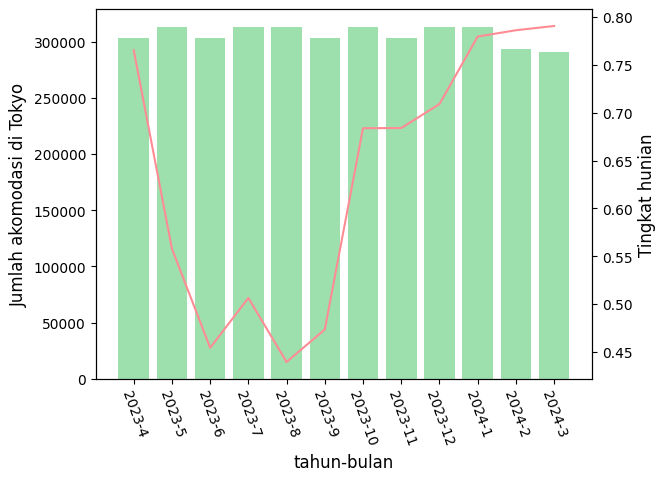

In [24]:
# Grafik jumlah akomodasi di Tokyo, tingkat hunian berdasarkan waktu
fig, ax1 = plt.subplots()
plt.xticks(rotation=-70)
ax2 = ax1.twinx()
ax1.bar(df_sum['date'].iloc[1:-1], df_sum['available_total'].iloc[1:-1], color="#9DE0AD")
ax2.plot(df_sum['date'].iloc[1:-1], df_sum['occupancy rate'].iloc[1:-1], color="#FF8C94")
ax1.set_xlabel('tahun-bulan', fontsize = 12)
ax1.set_ylabel('Jumlah akomodasi di Tokyo', fontsize = 12)
ax2.set_ylabel('Tingkat hunian', fontsize = 12);

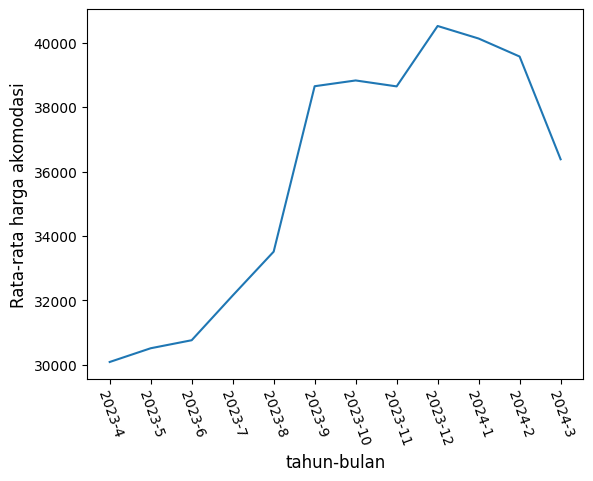

In [25]:
plt.plot(df_ave_p['date'].iloc[1:-1], df_ave_p['price'].iloc[1:-1])
plt.xticks(rotation=-70)
plt.xlabel('tahun-bulan', fontsize=12)
plt.ylabel('Rata-rata harga akomodasi', fontsize=12);

# Apa tipe ruangan yang populer

In [26]:
# numbers of beds -> listing.beds, property type -> listing.property_type,
# room type -> listing.room_type, accommodates -> listing.accommodates,

In [27]:
# calculate occupancy rate calendar by listing id
df_groupby_ava = calendar.groupby('listing_id')[['available_f', 'available_total']].sum()
df_groupby_ava['occupancy_rate'] = df_groupby_ava.available_f/df_groupby_ava.available_total
df_groupby_ava = df_groupby_ava.reset_index()

# merge this to listing dataframe
listing_new = pd.merge(listing, df_groupby_ava, how='left', left_on='id', right_on='listing_id')

In [28]:
# Histgram of number of beds
print('Harga termahal perkamar {}'.format(listing.beds.max()))
print('Harga termurah perkamar {}'.format(listing.beds.min()))
print('Jumlah maksimal akomodasi adalah {}'.format(listing.accommodates.max()))
print('Jumlah minimum akomodasi adalah {}'.format(listing.accommodates.min()))
print(listing.beds.value_counts())

Harga termahal perkamar 42.0
Harga termurah perkamar 1.0
Jumlah maksimal akomodasi adalah 16
Jumlah minimum akomodasi adalah 0
1.0     3045
2.0     2930
3.0     1180
4.0      977
5.0      356
6.0      246
7.0      114
8.0      111
10.0      65
9.0       27
11.0       9
12.0       8
13.0       5
16.0       3
14.0       3
18.0       2
20.0       2
36.0       1
30.0       1
15.0       1
42.0       1
Name: beds, dtype: int64


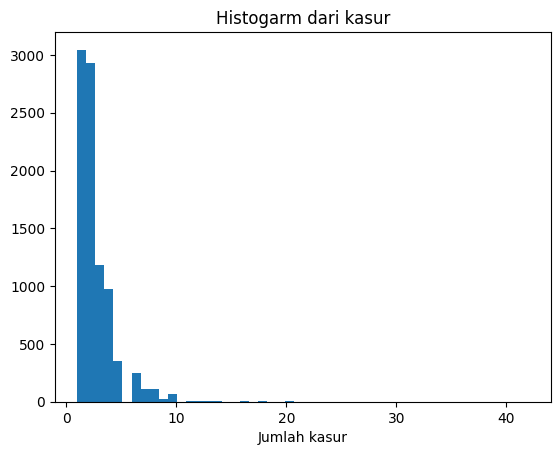

In [29]:
plt.figure()
plt.hist(listing.beds, bins=50)
plt.xlabel('Jumlah kasur')
plt.title('Histogarm dari kasur')
plt.show()

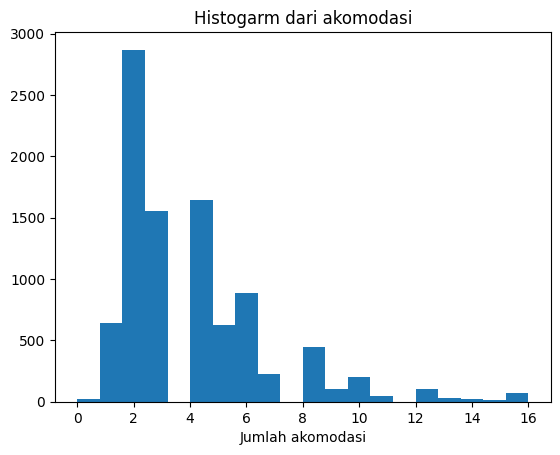

In [30]:
plt.figure()
plt.hist(listing.accommodates, bins=20)
plt.xlabel('Jumlah akomodasi')
plt.title('Histogarm dari akomodasi')
plt.show()

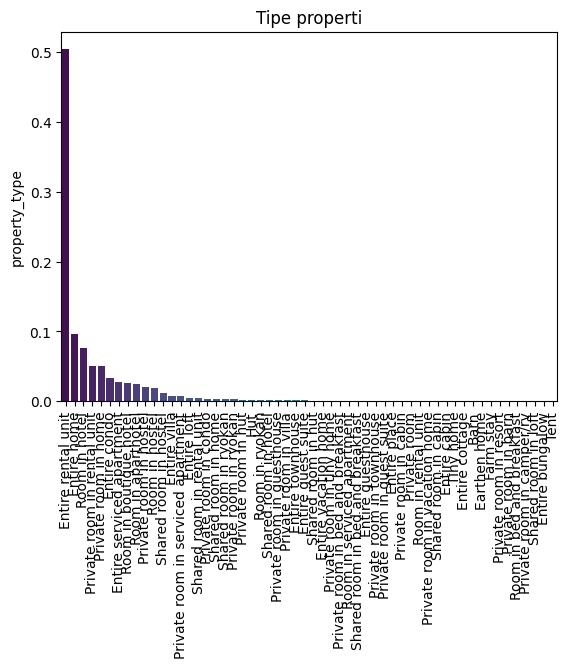

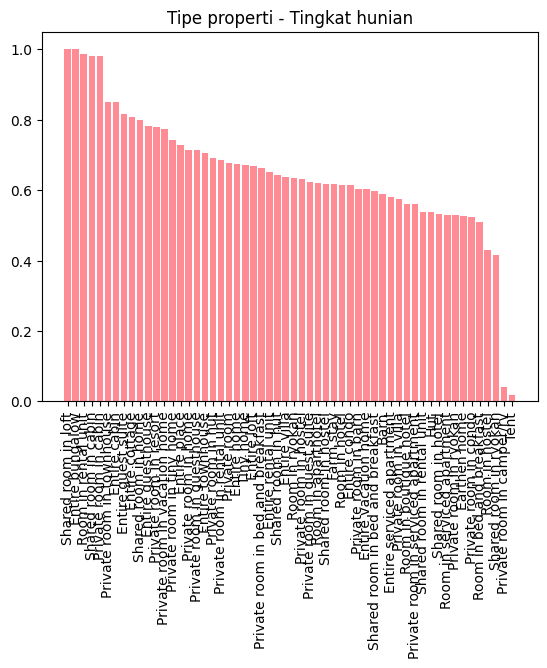

In [31]:
# Tipe properti -> listing.property_type
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x=listing_new.property_type.value_counts().index, y=listing_new.property_type.value_counts()/listing.shape[0], palette = 'viridis')
plt.title("Tipe properti")

# Membuat dataframe dan mengurutkan berdasarkan occupation_rate
property_type_oc = pd.DataFrame(listing_new.groupby('property_type').occupancy_rate.mean())
property_type_oc = property_type_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure()
plt.xticks(rotation=90)
plt.bar(property_type_oc.index, property_type_oc.occupancy_rate, color='#FF8C94')
plt.title("Tipe properti - Tingkat hunian");

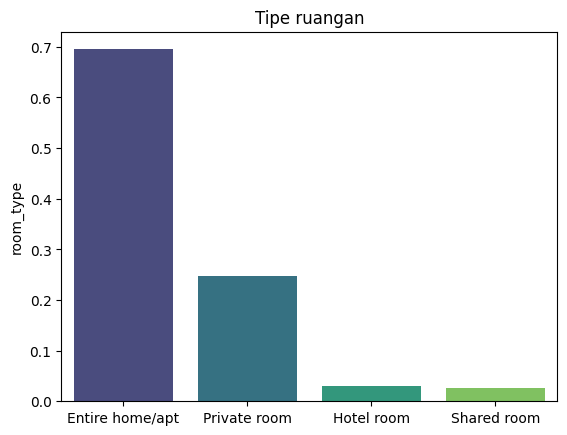

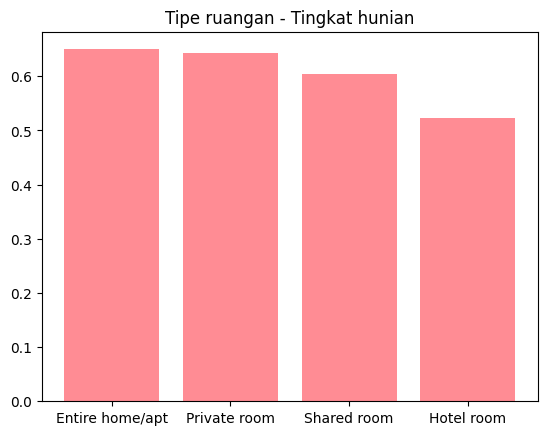

In [32]:
# Tipe ruangan -> listing.room_type
plt.figure()
room_type_counts = listing_new.room_type.value_counts()
sns.barplot(x=room_type_counts.index, y=room_type_counts/listing.shape[0], palette='viridis')
plt.title("Tipe ruangan")

# Membuat dataframe dan mengurutkan berdasarkan occupation_rate
room_type_oc = pd.DataFrame(listing_new.groupby('room_type').occupancy_rate.mean())
room_type_oc = room_type_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure()
plt.bar(room_type_oc.index, room_type_oc.occupancy_rate, color='#FF8C94')
plt.title("Tipe ruangan - Tingkat hunian");

# Distrik mana yang populer

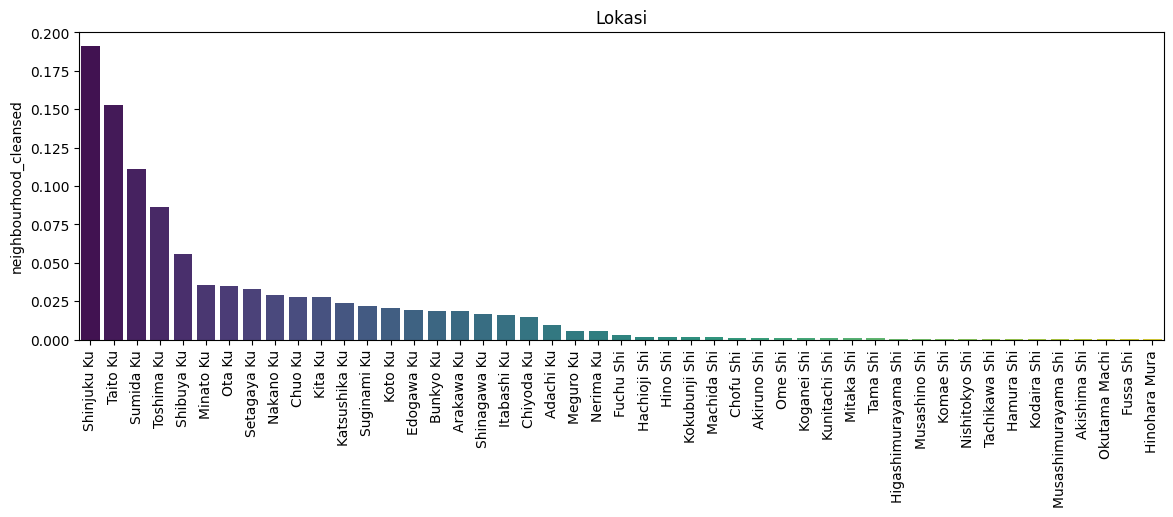

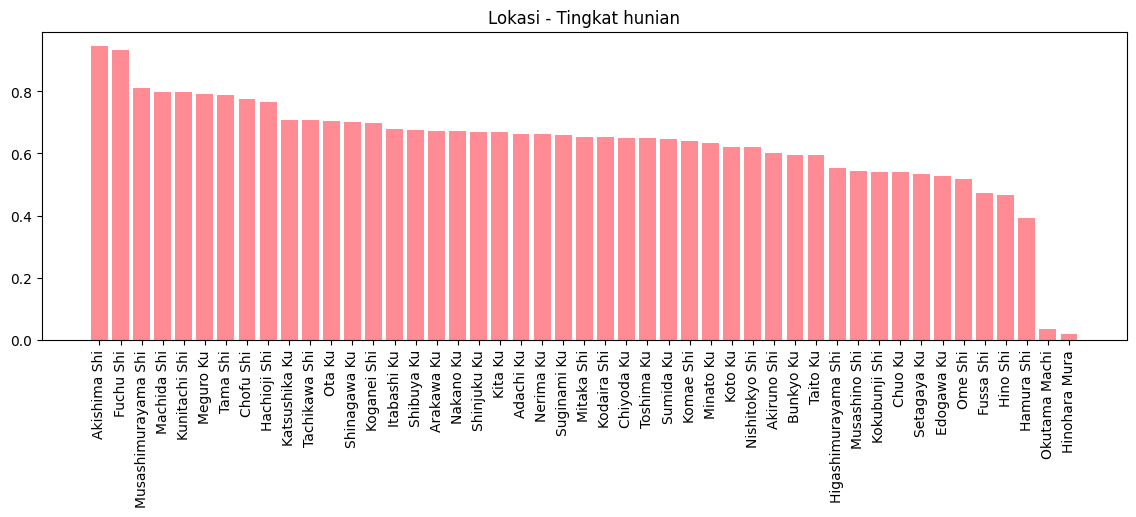

In [33]:
# Lokasi -> listing.neighbourhood_cleansed
plt.figure(figsize=(14, 4))
plt.xticks(rotation=90)
sns.barplot(x=listing_new.neighbourhood_cleansed.value_counts().index,
            y=listing_new.neighbourhood_cleansed.value_counts()/listing.shape[0],
            palette='viridis')
plt.title("Lokasi")

# Membuat dataframe dan mengurutkan berdasarkan occupation_rate
neighbourhood_cleansed_oc = pd.DataFrame(listing_new.groupby('neighbourhood_cleansed').occupancy_rate.mean())
neighbourhood_cleansed_oc = neighbourhood_cleansed_oc.sort_values(by=['occupancy_rate'], ascending=False)
plt.figure(figsize=(14, 4))
plt.xticks(rotation=90)
plt.bar(neighbourhood_cleansed_oc.index, neighbourhood_cleansed_oc.occupancy_rate, color='#FF8C94')
plt.title("Lokasi - Tingkat hunian");

# Berapa rata-rata harga untuk per orang

In [34]:
listing['price_pp'] = listing.price/listing.accommodates
print('Rata-rata harga per orang adalah {} yen.'.format(round(listing['price_pp'].mean())))

Rata-rata harga per orang adalah 5834 yen.
